# Eletric Fault Detection
### Author: Gustavo Amancio Affonso
### Year: 2024
### Database: https://www.kaggle.com/datasets/esathyaprakash/electrical-fault-detection-and-classification/data

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import mplcyberpunk
import seaborn as sns
plt.style.use('cyberpunk')


In [3]:
df = pd.read_csv('data\detect_dataset.csv')

In [4]:
df.head()

,Output (S),Ia,Ib,Ic,Va,Vb,Vc,Unnamed: 7,Unnamed: 8
0,0,-170.472196,9.219613,161.252583,0.054490,-0.659921,0.605431,NaN,NaN
1,0,-122.235754,6.168667,116.067087,0.102000,-0.628612,0.526202,NaN,NaN
2,0,-90.161474,3.813632,86.347841,0.141026,-0.605277,0.464251,NaN,NaN
3,0,-79.904916,2.398803,77.506112,0.156272,-0.602235,0.445963,NaN,NaN
4,0,-63.885255,0.590667,63.294587,0.180451,-0.591501,0.411050,NaN,NaN


In [5]:
df.columns

Index(['Output (S)', 'Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc', 'Unnamed: 7',
       'Unnamed: 8'],
      dtype='object')

In [6]:
df.describe()

,Output (S),Ia,Ib,Ic,Va,Vb,Vc,Unnamed: 7,Unnamed: 8
count,12001.000000,12001.000000,12001.000000,12001.000000,12001.000000,12001.000000,12001.000000,0.0,0.0
mean,0.457962,6.709369,-26.557793,22.353043,0.010517,-0.015498,0.004980,NaN,NaN
std,0.498250,377.158470,357.458613,302.052809,0.346221,0.357644,0.349272,NaN,NaN
min,0.000000,-883.542316,-900.526951,-883.357762,-0.620748,-0.659921,-0.612709,NaN,NaN
25%,0.000000,-64.348986,-51.421937,-54.562257,-0.237610,-0.313721,-0.278951,NaN,NaN
50%,0.000000,-3.239788,4.711283,-0.399419,0.002465,-0.007192,0.008381,NaN,NaN
75%,1.000000,53.823453,69.637787,45.274542,0.285078,0.248681,0.289681,NaN,NaN
max,1.000000,885.738571,889.868884,901.274261,0.609864,0.627875,0.608243,NaN,NaN


In [7]:
df.isnull()


,Output (S),Ia,Ib,Ic,Va,Vb,Vc,Unnamed: 7,Unnamed: 8
0,False,False,False,False,False,False,False,True,True
1,False,False,False,False,False,False,False,True,True
2,False,False,False,False,False,False,False,True,True
3,False,False,False,False,False,False,False,True,True
4,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...
11996,False,False,False,False,False,False,False,True,True
11997,False,False,False,False,False,False,False,True,True
11998,False,False,False,False,False,False,False,True,True
11999,False,False,False,False,False,False,False,True,True


In [8]:
df = df.drop(columns=['Unnamed: 7', 'Unnamed: 8'])
df.head()

,Output (S),Ia,Ib,Ic,Va,Vb,Vc
0,0,-170.472196,9.219613,161.252583,0.054490,-0.659921,0.605431
1,0,-122.235754,6.168667,116.067087,0.102000,-0.628612,0.526202
2,0,-90.161474,3.813632,86.347841,0.141026,-0.605277,0.464251
3,0,-79.904916,2.398803,77.506112,0.156272,-0.602235,0.445963
4,0,-63.885255,0.590667,63.294587,0.180451,-0.591501,0.411050


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12001 entries, 0 to 12000
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Output (S)  12001 non-null  int64  
 1   Ia          12001 non-null  float64
 2   Ib          12001 non-null  float64
 3   Ic          12001 non-null  float64
 4   Va          12001 non-null  float64
 5   Vb          12001 non-null  float64
 6   Vc          12001 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 656.4 KB


In [10]:
def reduce_mem_usage(df):
    start_mem = df.memory_usage().sum() / 1024**2
    print(f'Memória inicial utilizada pelo DataFrame: {start_mem:.2f} MB')

    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')
    end_mem = df.memory_usage().sum() / 1024**2
    print(f'Memória final utilizada pelo DataFrame: {end_mem:.2f} MB')
    print(f'Redução de memória: {100 * (start_mem - end_mem) / start_mem:.1f}%')

    return df

In [11]:
df_optmized = reduce_mem_usage(df)

df.info()

Memória inicial utilizada pelo DataFrame: 0.64 MB
Memória final utilizada pelo DataFrame: 0.15 MB
Redução de memória: 76.8%
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12001 entries, 0 to 12000
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Output (S)  12001 non-null  int8   
 1   Ia          12001 non-null  float16
 2   Ib          12001 non-null  float16
 3   Ic          12001 non-null  float16
 4   Va          12001 non-null  float16
 5   Vb          12001 non-null  float16
 6   Vc          12001 non-null  float16
dtypes: float16(6), int8(1)
memory usage: 152.5 KB


#### Distribution

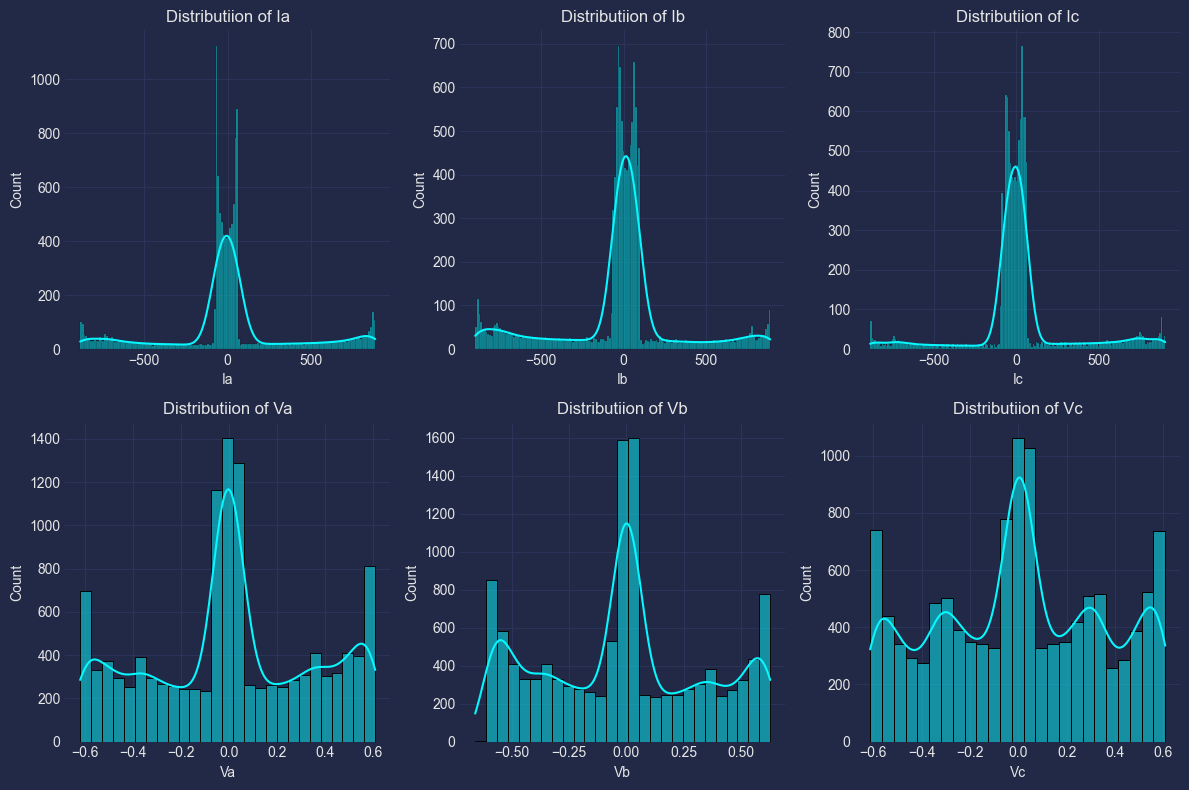

In [12]:
features = ['Ia','Ib','Ic','Va','Vb','Vc']
plt.figure(figsize=(12,8))
for i,feature in enumerate(features):
  plt.subplot(2,3,i+1)
  sns.histplot(df[feature],kde=True)
  plt.title(f'Distributiion of {feature}')
  
plt.tight_layout()

#### Visualization

Text(0.5, 1.0, '% Output')

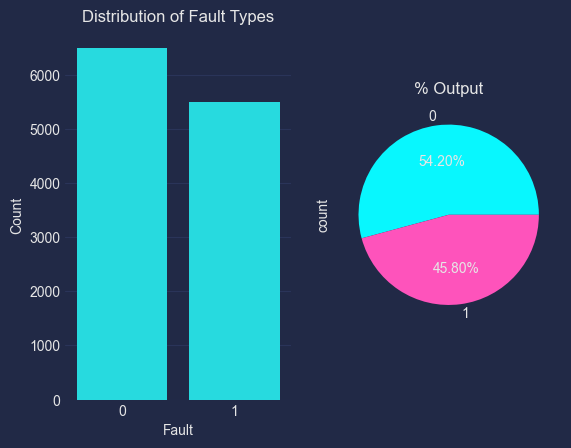

In [13]:
ax = plt.subplot(1,2,1)
ax = sns.countplot(x=df_optmized['Output (S)'])
plt.title('Distribution of Fault Types')
plt.ylabel('Count')
plt.xlabel('Fault')

ax1=plt.subplot(1,2,2)
ax1 = df_optmized['Output (S)'].value_counts().plot.pie(autopct='%1.2f%%')
ax1.set_title('% Output')

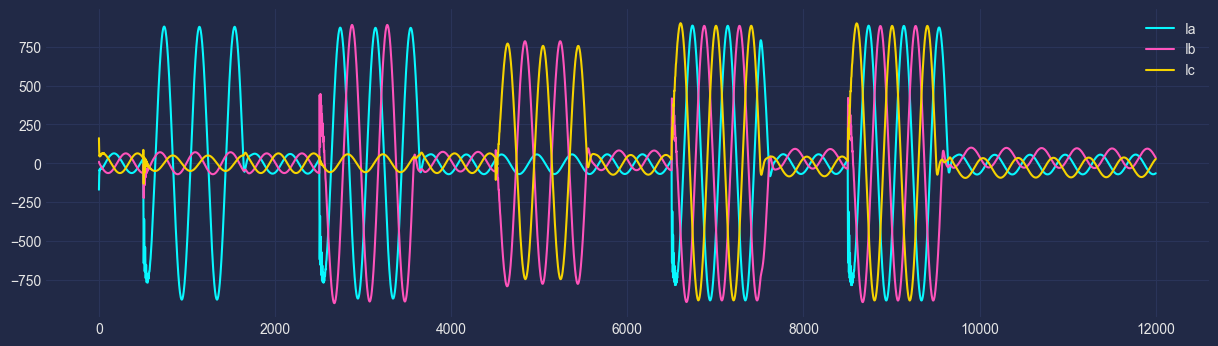

In [14]:
plt.figure(figsize=(15,4))
plt.plot(df['Ia'],label='Ia')
plt.plot(df['Ib'],label='Ib')
plt.plot(df['Ic'],label='Ic')
plt.legend()

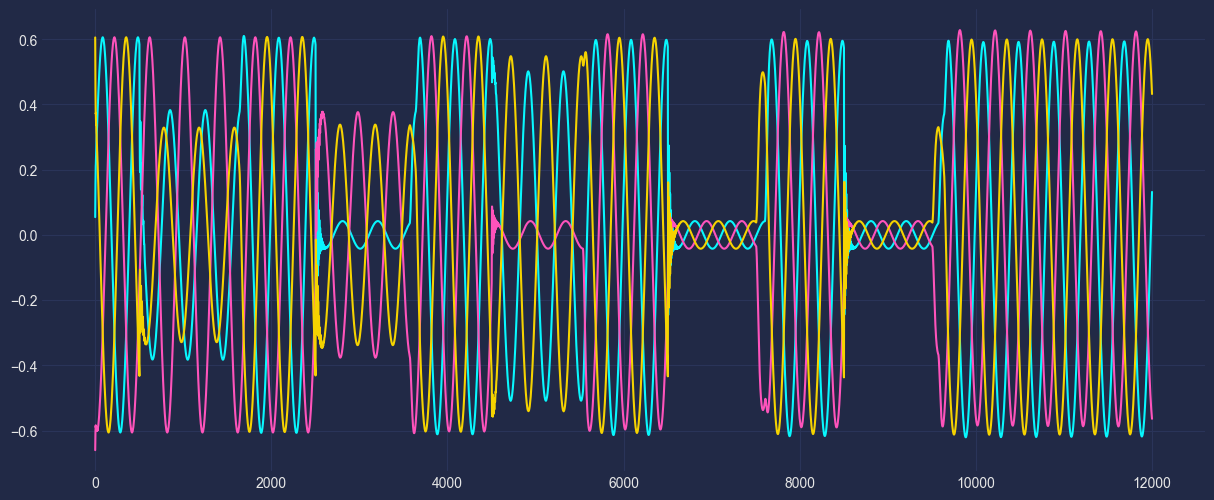

In [15]:
plt.figure(figsize=(15,6))
plt.plot(df['Va'],label='Va')
plt.plot(df['Vb'],label='Vb')
plt.plot(df['Vc'],label='Vc')


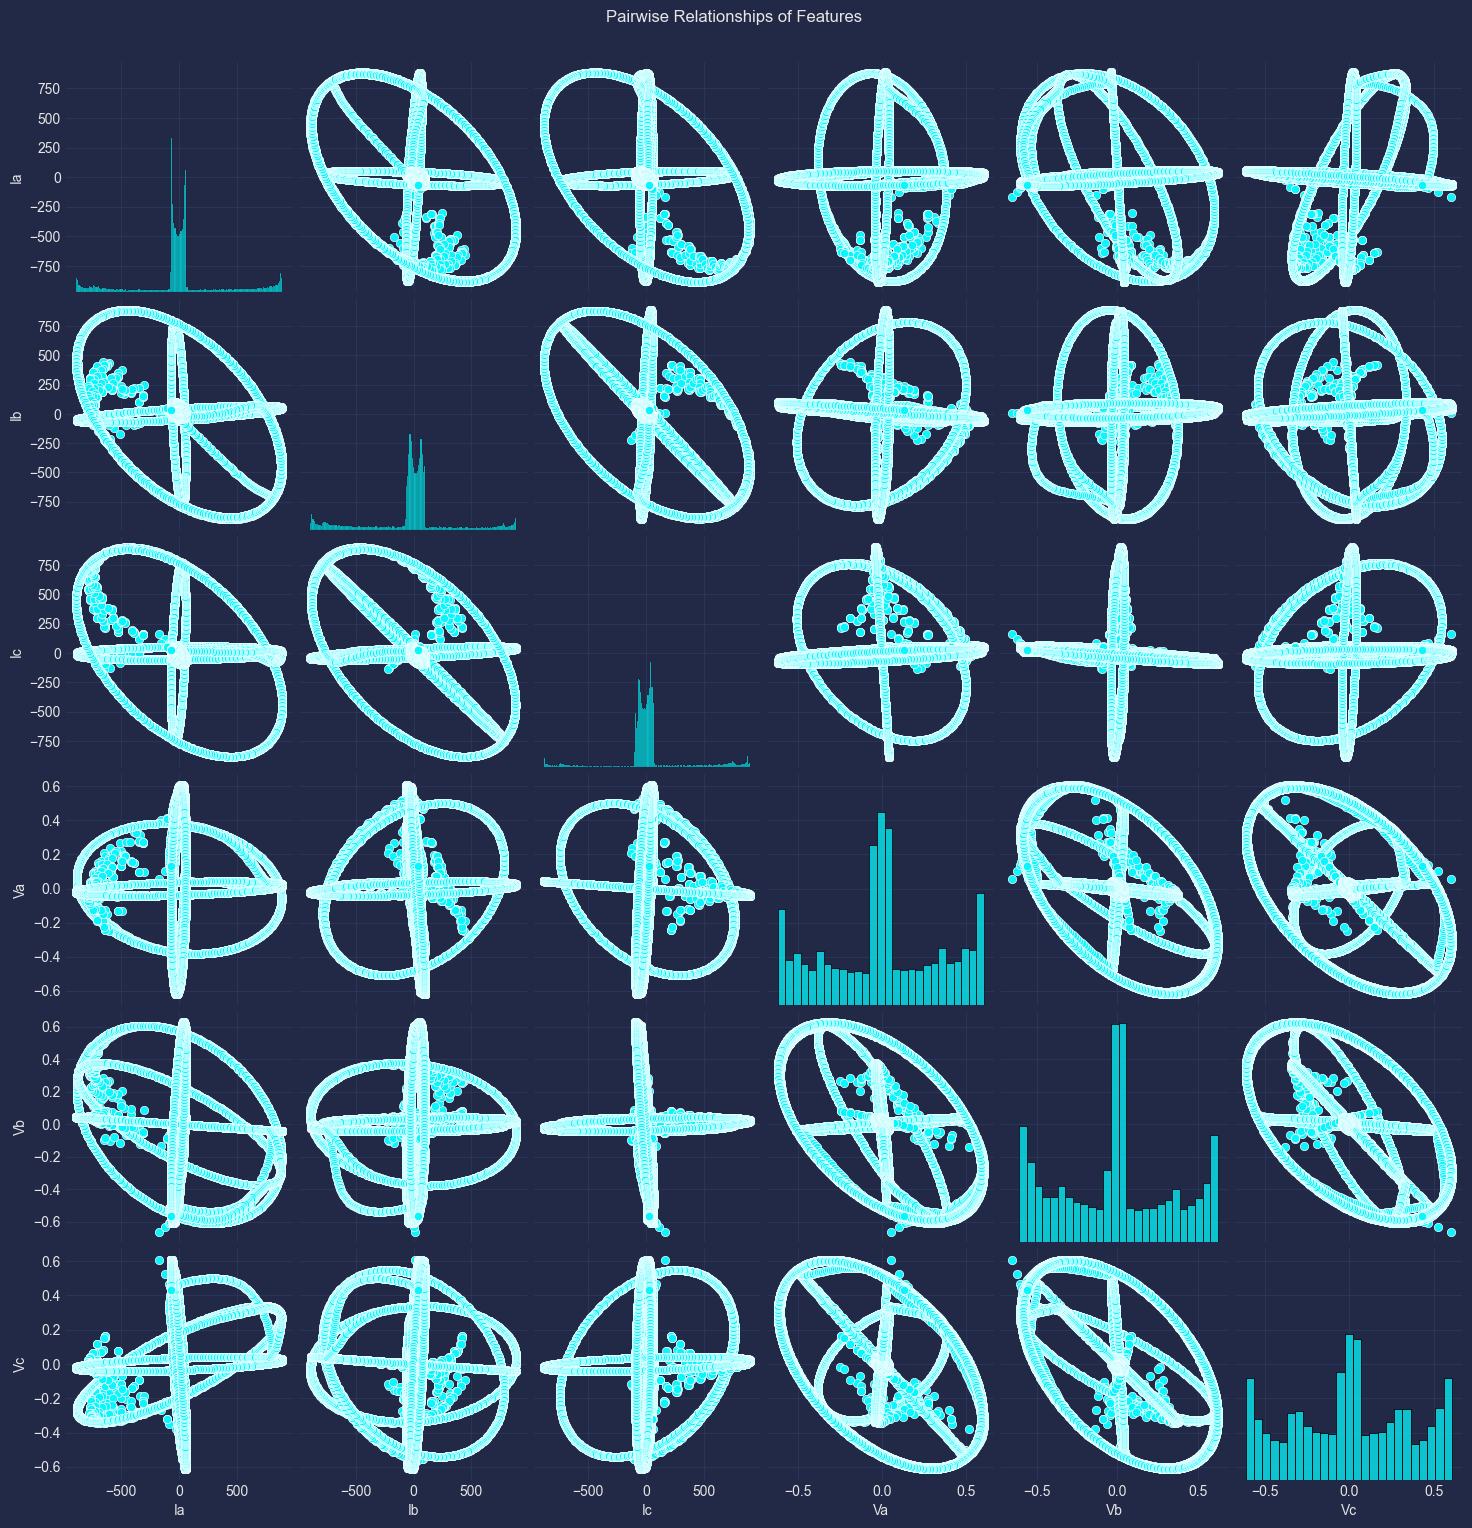

In [16]:
sns.pairplot(df_optmized[features])
plt.suptitle('Pairwise Relationships of Features', y=1.02)
plt.show()

#### Non-Faulty Data

In [17]:
nonfaulty_df= df_optmized[df_optmized['Output (S)']==0]
nonfaulty_df = nonfaulty_df.reset_index()
nonfaulty_df.describe()

,index,Output (S),Ia,Ib,Ic,Va,Vb,Vc
count,6505.000000,6505.0,6505.000000,6505.000000,6505.00000,6505.000000,6505.000000,6505.000000
mean,6805.269178,0.0,-6.953125,inf,-inf,0.021774,-0.019516,-0.002264
std,3703.980649,0.0,44.812500,47.781250,48.03125,0.432129,0.428223,0.421631
min,0.000000,0.0,-170.500000,-106.250000,-107.43750,-0.620605,-0.660156,-0.612793
25%,3889.000000,0.0,-51.281250,-25.703125,-55.90625,-0.412109,-0.442871,-0.411865
50%,7615.000000,0.0,-7.222656,15.125000,-8.46875,0.049072,-0.056641,-0.003967
75%,10374.000000,0.0,37.218750,61.093750,32.62500,0.454834,0.410400,0.418213
max,12000.000000,0.0,104.125000,100.250000,161.25000,0.609863,0.627930,0.608398


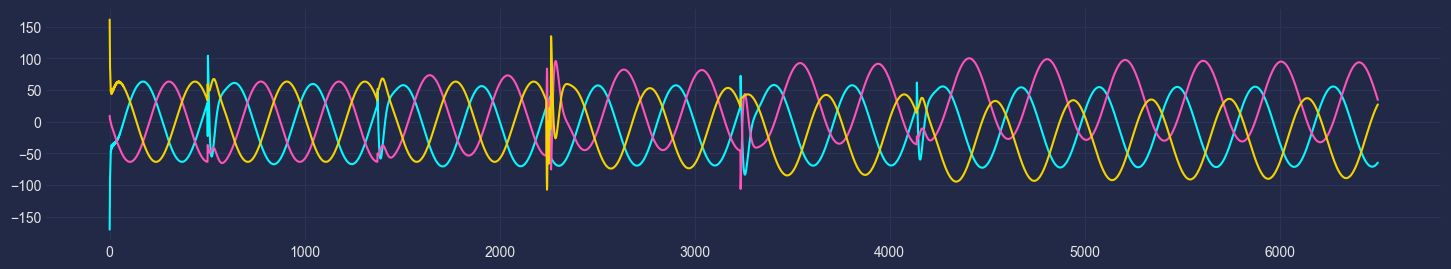

In [18]:
ax = plt.figure(figsize = (18,3))
ax = plt.plot(nonfaulty_df["Ia"])
ax = plt.plot(nonfaulty_df["Ib"])
ax = plt.plot(nonfaulty_df["Ic"])

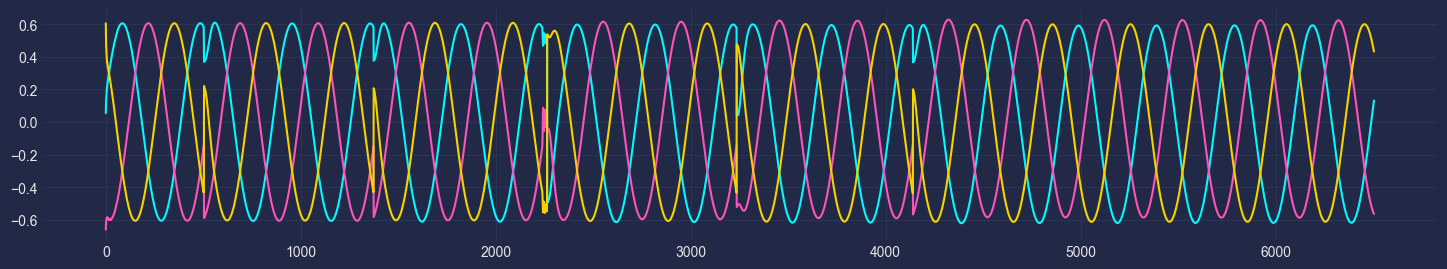

In [19]:
ax = plt.figure(figsize = (18,3))
ax = plt.plot(nonfaulty_df["Va"])
ax = plt.plot(nonfaulty_df["Vb"])
ax = plt.plot(nonfaulty_df["Vc"])

#### Faulty Data

In [20]:
faulty_df= df_optmized[df_optmized['Output (S)']==1]
faulty_df = faulty_df.reset_index()
faulty_df.describe()

,index,Output (S),Ia,Ib,Ic,Va,Vb,Vc
count,5496.000000,5496.0,5496.00000,5496.000000,5496.000000,5496.000000,5496.000000,5496.000000
mean,5046.893013,1.0,inf,-inf,inf,-0.002808,-0.010750,0.013557
std,2880.504336,0.0,inf,inf,inf,0.200928,0.249268,0.236206
min,504.000000,1.0,-883.50000,-900.500000,-883.500000,-0.508789,-0.607910,-0.541016
25%,2747.750000,1.0,-477.62500,-551.500000,-51.437500,-0.040840,-0.041779,-0.112000
50%,5011.500000,1.0,17.03125,-34.546875,13.695312,-0.004028,-0.000236,0.010975
75%,7357.250000,1.0,531.00000,241.000000,320.937500,0.040253,0.040771,0.167053
max,9635.000000,1.0,885.50000,890.000000,901.500000,0.518555,0.605957,0.547852


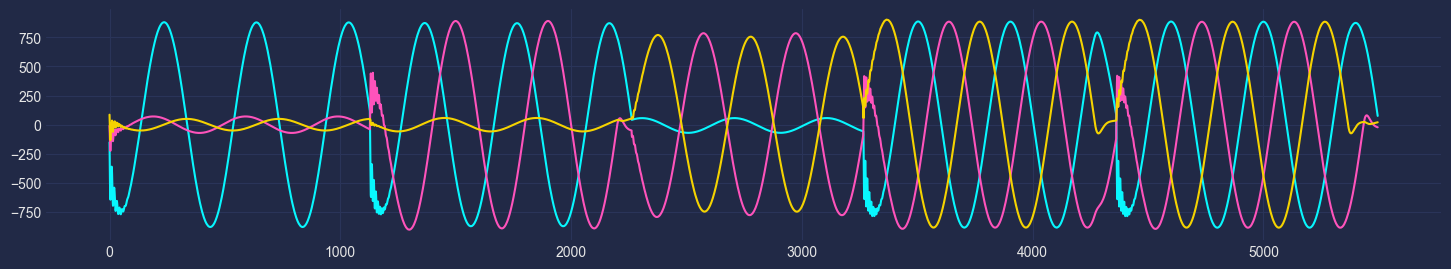

In [21]:
ax = plt.figure(figsize = (18,3))
ax = plt.plot(faulty_df["Ia"])
ax = plt.plot(faulty_df["Ib"])
ax = plt.plot(faulty_df["Ic"])

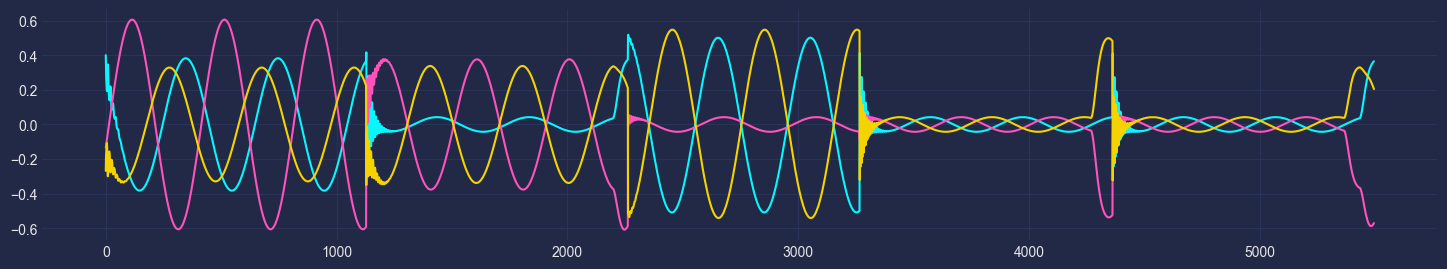

In [22]:
ax = plt.figure(figsize = (18,3))
ax = plt.plot(faulty_df["Va"])
ax = plt.plot(faulty_df["Vb"])
ax = plt.plot(faulty_df["Vc"])

#### Correlation map

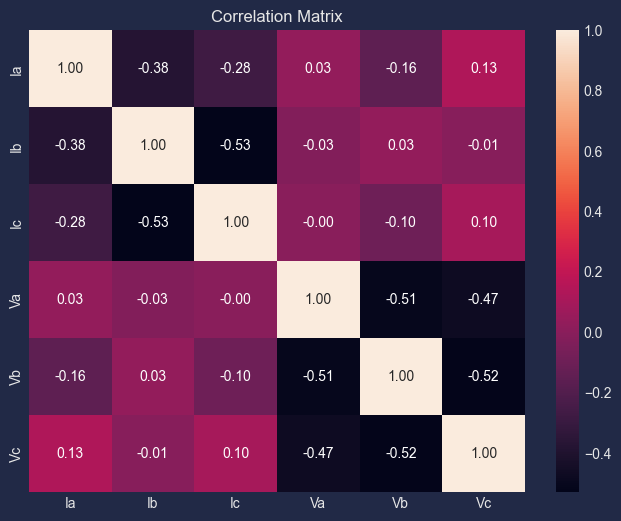

In [23]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_optmized[features].corr(), annot=True,  fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [24]:
X = df_optmized.drop(['Output (S)'],axis=1)
y = df_optmized['Output (S)']

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=42)

In [29]:
y_test

2271     0
3495     1
10265    0
5739     0
360      0
        ..
1195     1
9520     1
6699     1
3857     0
10153    0
Name: Output (S), Length: 2401, dtype: int8

In [26]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.linear_model import  LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


#### Logistic Regression


Training Accuracy    : 73.23 %
Model Accuracy Score : 73.72 %
Classification_Report: 
               precision    recall  f1-score   support

           0       0.67      1.00      0.81      1306
           1       1.00      0.42      0.60      1095

    accuracy                           0.74      2401
   macro avg       0.84      0.71      0.70      2401
weighted avg       0.82      0.74      0.71      2401



<Axes: >

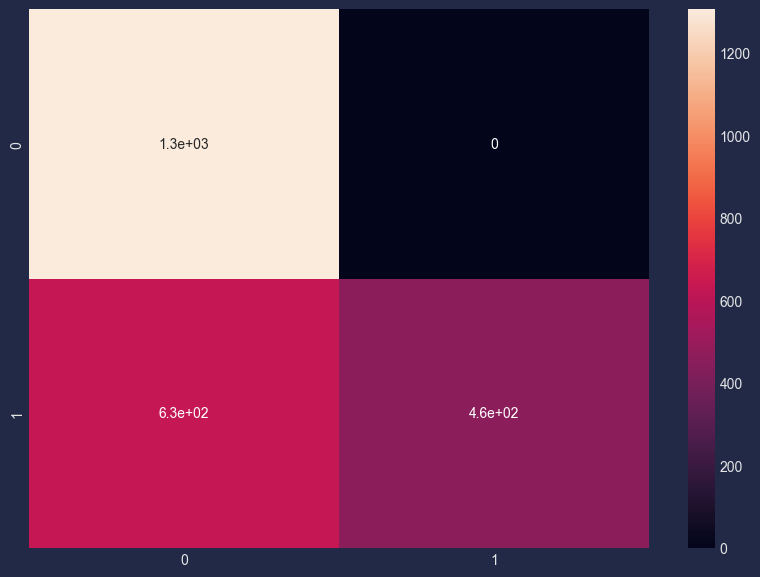

In [54]:
logReg = LogisticRegression()

logReg.fit(X_train,y_train)
y_pred = logReg.predict(X_test)

log_train = round(logReg.score(X_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(y_pred, y_test) * 100, 2)

print("Training Accuracy    :",log_train ,"%")
print("Model Accuracy Score :",log_accuracy ,"%")
print("Classification_Report: \n",classification_report(y_test,y_pred))

cm = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(cm)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)




#### DecisionTree

Training Accuracy    : 99.96 %
Model Accuracy Score : 99.54 %
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1306
           1       0.99      1.00      0.99      1095

    accuracy                           1.00      2401
   macro avg       1.00      1.00      1.00      2401
weighted avg       1.00      1.00      1.00      2401



<Axes: >

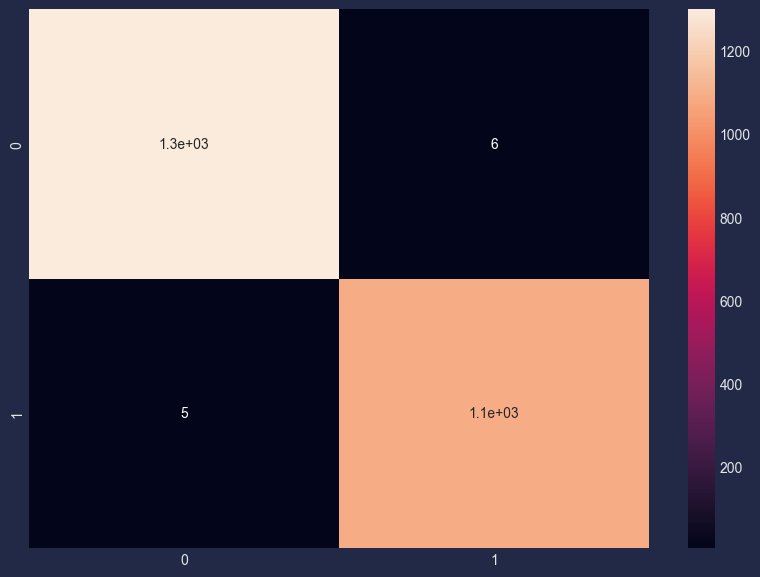

In [52]:
tree = DecisionTreeClassifier()

tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)

tree_train = round(tree.score(X_train, y_train) * 100, 2)
tree_accuracy = round(accuracy_score(y_pred, y_test) * 100, 2)

print("Training Accuracy    :",tree_train ,"%")
print("Model Accuracy Score :",tree_accuracy ,"%")
print("Classification_Report: \n",classification_report(y_test,y_pred))

cm = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(cm)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)


#### Random Forest

Training Accuracy    : 99.95 %
Model Accuracy Score : 99.79 %
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1306
           1       1.00      1.00      1.00      1095

    accuracy                           1.00      2401
   macro avg       1.00      1.00      1.00      2401
weighted avg       1.00      1.00      1.00      2401



<Axes: >

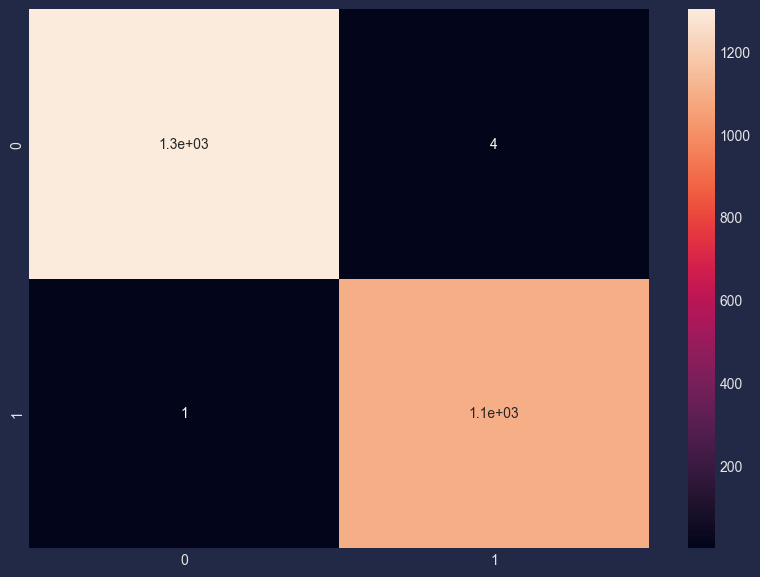

In [53]:
rf = RandomForestClassifier(n_estimators=30)

rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

rf_train = round(rf.score(X_train, y_train) * 100, 2)
rf_accuracy = round(accuracy_score(y_pred, y_test) * 100, 2)

print("Training Accuracy    :",rf_train ,"%")
print("Model Accuracy Score :",rf_accuracy ,"%")
print("Classification_Report: \n",classification_report(y_test,y_pred))

cm = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(cm)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)

#### XGBOOST

Training Accuracy    : 99.94 %
Model Accuracy Score : 99.71 %
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1306
           1       1.00      1.00      1.00      1095

    accuracy                           1.00      2401
   macro avg       1.00      1.00      1.00      2401
weighted avg       1.00      1.00      1.00      2401



<Axes: >

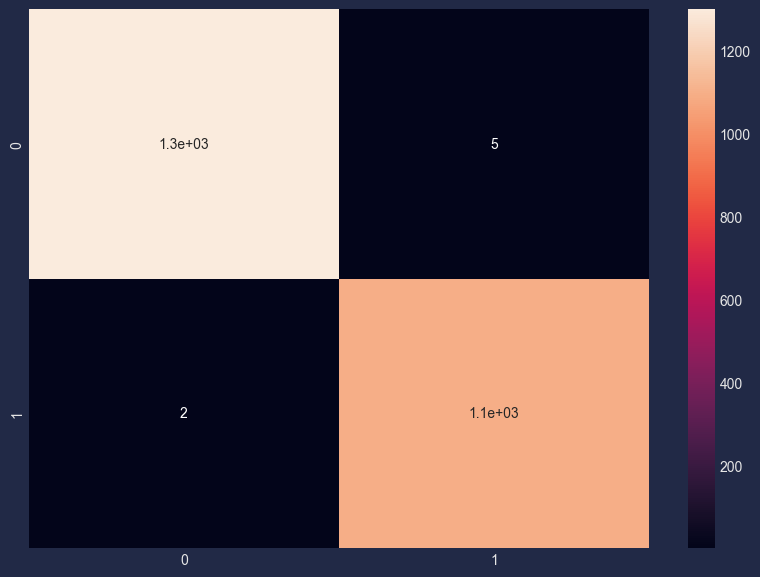

In [51]:
xgb = XGBClassifier()

xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)

xgb_train = round(xgb.score(X_train, y_train) * 100, 2)
xgb_accuracy = round(accuracy_score(y_pred, y_test) * 100, 2)

print("Training Accuracy    :",xgb_train ,"%")
print("Model Accuracy Score :",xgb_accuracy ,"%")
print("Classification_Report: \n",classification_report(y_test,y_pred))

cm = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(cm)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)

#### GradientBoost

Training Accuracy    : 99.9 %
Model Accuracy Score : 99.67 %
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1306
           1       1.00      1.00      1.00      1095

    accuracy                           1.00      2401
   macro avg       1.00      1.00      1.00      2401
weighted avg       1.00      1.00      1.00      2401



<Axes: >

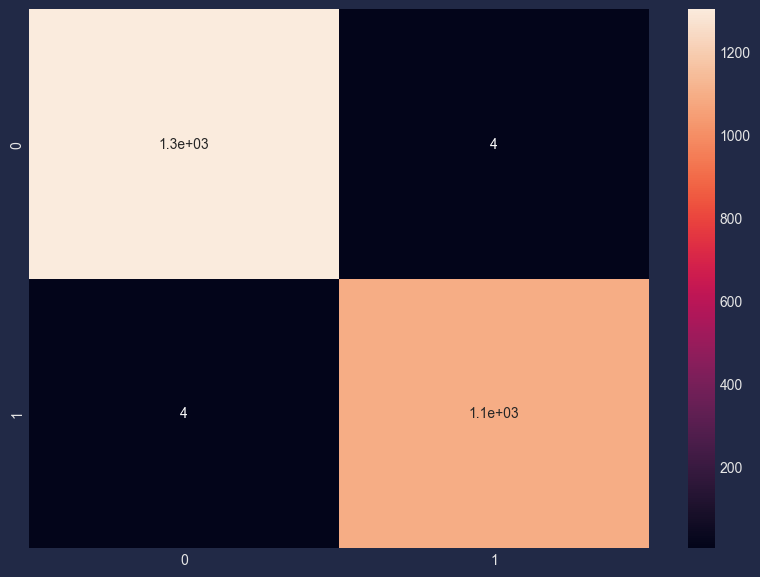

In [50]:
gb = GradientBoostingClassifier()

gb.fit(X_train,y_train)
y_pred = gb.predict(X_test)

gb_train = round(gb.score(X_train, y_train) * 100, 2)
gb_accuracy = round(accuracy_score(y_pred, y_test) * 100, 2)

print("Training Accuracy    :",gb_train ,"%")
print("Model Accuracy Score :",gb_accuracy ,"%")
print("Classification_Report: \n",classification_report(y_test,y_pred))

cm = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(cm)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)

#### ADABOOST

Training Accuracy    : 99.77 %
Model Accuracy Score : 99.67 %
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1306
           1       1.00      1.00      1.00      1095

    accuracy                           1.00      2401
   macro avg       1.00      1.00      1.00      2401
weighted avg       1.00      1.00      1.00      2401



<Axes: >

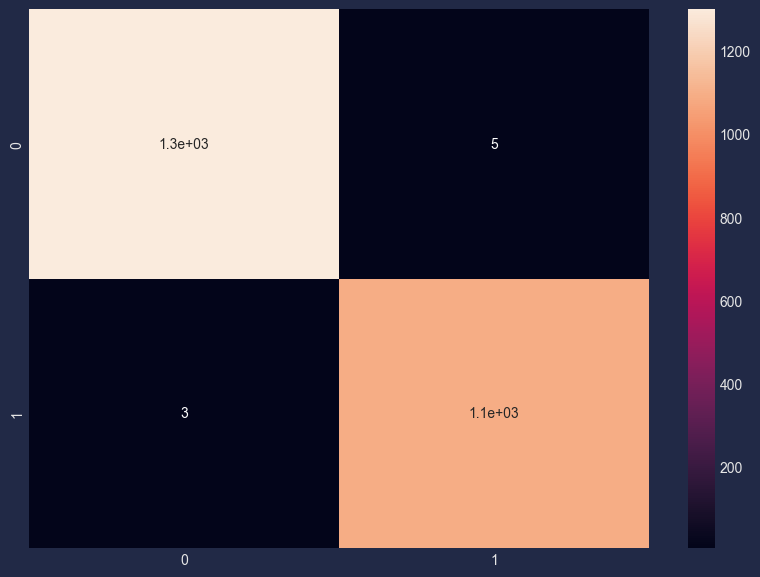

In [49]:
ada = AdaBoostClassifier()

ada.fit(X_train,y_train)
y_pred = ada.predict(X_test)

ada_train = round(ada.score(X_train, y_train) * 100, 2)
ada_accuracy = round(accuracy_score(y_pred, y_test) * 100, 2)

print("Training Accuracy    :",ada_train ,"%")
print("Model Accuracy Score :",ada_accuracy ,"%")
print("Classification_Report: \n",classification_report(y_test,y_pred))

cm = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(cm)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)

#### MLP

Training Accuracy    : 99.27 %
Model Accuracy Score : 99.21 %
Classification_Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1306
           1       1.00      0.99      0.99      1095

    accuracy                           0.99      2401
   macro avg       0.99      0.99      0.99      2401
weighted avg       0.99      0.99      0.99      2401



<Axes: >

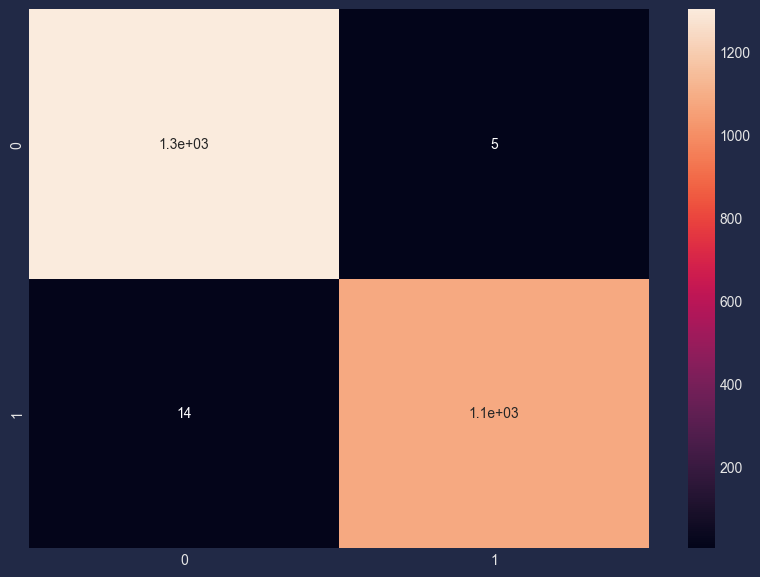

In [48]:
mlp = MLPClassifier(hidden_layer_sizes=(10,10,5,5,2),max_iter=1000)

mlp.fit(X_train,y_train)
y_pred = mlp.predict(X_test)

mlp_train = round(mlp.score(X_train, y_train) * 100, 2)
mlp_accuracy = round(accuracy_score(y_pred, y_test) * 100, 2)

print("Training Accuracy    :",mlp_train ,"%")
print("Model Accuracy Score :",mlp_accuracy ,"%")
print("Classification_Report: \n",classification_report(y_test,y_pred))

cm = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(cm)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)

#### KNN

Training Accuracy    : 99.28 %
Model Accuracy Score : 99.25 %
Classification_Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1306
           1       0.99      0.99      0.99      1095

    accuracy                           0.99      2401
   macro avg       0.99      0.99      0.99      2401
weighted avg       0.99      0.99      0.99      2401



<Axes: >

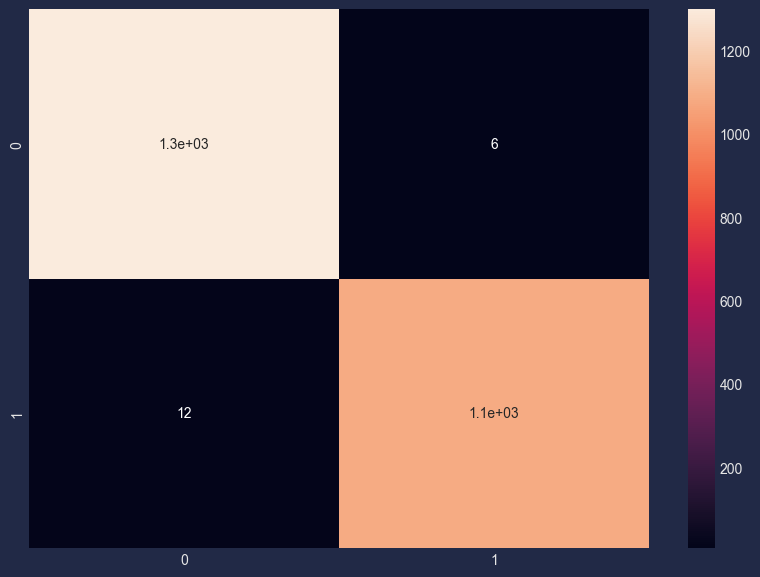

In [47]:
knn = KNeighborsClassifier()

knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

knn_train = round(knn.score(X_train, y_train) * 100, 2)
knn_accuracy = round(accuracy_score(y_pred, y_test) * 100, 2)

print("Training Accuracy    :",knn_train ,"%")
print("Model Accuracy Score :",knn_accuracy ,"%")
print("Classification_Report: \n",classification_report(y_test,y_pred))

cm = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(cm)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)

#### SVM

Training Accuracy    : 98.07 %
Model Accuracy Score : 98.42 %
Classification_Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      1306
           1       1.00      0.97      0.98      1095

    accuracy                           0.98      2401
   macro avg       0.99      0.98      0.98      2401
weighted avg       0.98      0.98      0.98      2401



<Axes: >

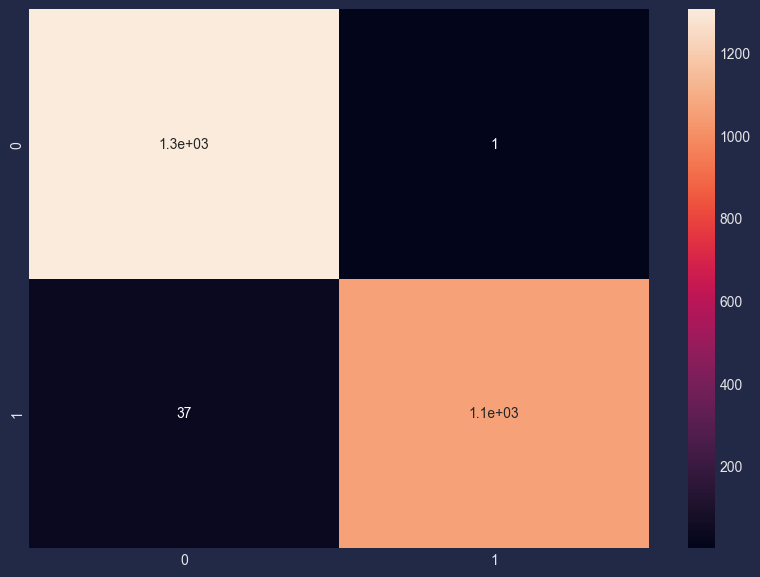

In [46]:
svm = SVC()

svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)

svc_train = round(svm.score(X_train, y_train) * 100, 2)
svc_accuracy = round(accuracy_score(y_pred, y_test) * 100, 2)

print("Training Accuracy    :",svc_train ,"%")
print("Model Accuracy Score :",svc_accuracy ,"%")
print("Classification_Report: \n",classification_report(y_test,y_pred))

cm = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(cm)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)

#### Summary

In [58]:
models = pd.DataFrame({
  'Model':['SVM',
           'Logistic Regression',
           'Random Forest',
           'Decision Tree',
           'Gradient Boosting',
           'Ada Boost',
           'XG Boost',
           'KNN',
           'MLP'],
  'Training Accuracy':[svc_train,log_train,rf_train,tree_train,gb_train,ada_train,xgb_train,knn_train,mlp_train],
  'Model Accuracy':[svc_accuracy,log_accuracy,rf_accuracy,tree_accuracy,gb_accuracy,ada_accuracy,xgb_accuracy,knn_accuracy,mlp_accuracy]
})


models.sort_values(by='Model Accuracy',ascending=False).style.background_gradient()

,Model,Training Accuracy,Model Accuracy
2,Random Forest,99.950000,99.790000
6,XG Boost,99.940000,99.710000
4,Gradient Boosting,99.900000,99.670000
5,Ada Boost,99.770000,99.670000
3,Decision Tree,99.960000,99.540000
7,KNN,99.280000,99.250000
8,MLP,99.270000,99.210000
0,SVM,98.070000,98.420000
1,Logistic Regression,73.230000,73.720000
